In [2]:
# !pip install fredapi
# !pip install pandas_datareader

In [3]:
from fredapi import Fred
import pandas as pd

# 替换成你的 FRED API key
FRED_API_KEY = 'fe51075dc6ffec4dc67337481c0e8d12'
fred = Fred(api_key=FRED_API_KEY)

# 各州缩写
states = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
          'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC']

us_states_dict = {
    'AL': 'Alabama',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC':'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# 定义各州对应的大区
state_to_region = {
    "AL": "South", "AZ": "West", "AR": "South", "CA": "West", "CO": "West", 
    "CT": "Northeast", 'DC':"South", "DE": "South", "FL": "South", "GA": "South", "ID": "West", 
    "IL": "Midwest", "IN": "Midwest", "IA": "Midwest", "KS": "Midwest", "KY": "South", "LA": "South", 
    "ME": "Northeast", "MD": "South", "MA": "Northeast", "MI": "Midwest", "MN": "Midwest", "MS": "South", 
    "MO": "Midwest", "MT": "West", "NE": "Midwest", "NV": "West", "NH": "Northeast", "NJ": "Northeast", 
    "NM": "West", "NY": "Northeast", "NC": "South", "ND": "Midwest", "OH": "Midwest", "OK": "South", 
    "OR": "West", "PA": "Northeast", "RI": "Northeast", "SC": "South", "SD": "Midwest", "TN": "South", 
    "TX": "South", "UT": "West", "VT": "Northeast", "VA": "South", "WA": "West", "WV": "South", 
    "WI": "Midwest", "WY": "West"
}

# 我们先准备一个缩写 -> FIPS 编码的字典
state_fips = {
    'AL': '01', 'AZ': '04', 'AR': '05', 'CA': '06', 'CO': '08', 'CT': '09',
    'DE': '10', 'DC':'11', 'FL': '12', 'GA': '13', 'ID': '16', 'IL': '17', 'IN': '18',
    'IA': '19', 'KS': '20', 'KY': '21', 'LA': '22', 'ME': '23', 'MD': '24', 'MA': '25',
    'MI': '26', 'MN': '27', 'MS': '28', 'MO': '29', 'MT': '30', 'NE': '31', 'NV': '32',
    'NH': '33', 'NJ': '34', 'NM': '35', 'NY': '36', 'NC': '37', 'ND': '38', 'OH': '39',
    'OK': '40', 'OR': '41', 'PA': '42', 'RI': '44', 'SC': '45', 'SD': '46', 'TN': '47',
    'TX': '48', 'UT': '49', 'VT': '50', 'VA': '51', 'WA': '53', 'WV': '54', 'WI': '55',
    'WY': '56'
}

# 目标年份区间
start = '2005-01-01'
end = '2024-12-31'

In [4]:
import time

# 创建空的DataFrame来存放合并结果
df_ur_by_M = pd.DataFrame()

# 存储结果
ur_all = []

for state in states:
    try:
        # 失业率
        unemp_series_id = f"{state}UR"
        unemp = fred.get_series(unemp_series_id, start, end)
        df_unemp = unemp.reset_index()
        df_unemp.columns = ['date', 'unemployment_rate']
        df_unemp['state'] = state
        ur_all.append(df_unemp)
        time.sleep(0.2)  # 避免请求过快
    except Exception as e:
        print(f"跳过 {state}: {e}")


# 合并所有州数据
df_ur_by_M = pd.concat(ur_all).dropna()
df_ur_by_M['date'] = pd.to_datetime(df_ur_by_M['date'])

df_ur_by_M.to_csv("us_ur_by_M.csv", index=False)
print("数据已保存为 us_ur_by_M.csv")

import numpy as np

means = [
    df_ur_by_M["unemployment_rate"][3*i:3*i+3].mean()
    for i in range(len(df_ur_by_M) // 3)
]
df_ur_by_Q = df_ur_by_M.iloc[::3].copy()
df_ur_by_Q["unemployment_rate"] = means
# df_ur_by_Q

数据已保存为 us_ur_by_M.csv


In [5]:
# 创建空的DataFrame来存放合并结果
df_gdp_by_Q = pd.DataFrame()

# 存储结果
gdp_all = []

for state in states:
    try:
        # GDP
        gdp_series_id = f"{state}NQGSP"
        gdp = fred.get_series(gdp_series_id, start, end)
        df_gdp = gdp.reset_index()
        df_gdp.columns = ['date', 'gdp']
        df_gdp['state'] = state
        gdp_all.append(df_gdp)
        time.sleep(0.2)  # 避免请求过快
    except Exception as e:
        print(f"跳过 {state}: {e}")


# 合并所有州数据
df_gdp_by_Q = pd.concat(gdp_all).dropna()
df_gdp_by_Q['date'] = pd.to_datetime(df_gdp_by_Q['date'])

df_gdp_by_Q.to_csv("us_gdp_by_Q.csv", index=False)
print("数据已保存为 us_gdp_by_Q.csv")



数据已保存为 us_gdp_by_Q.csv


In [6]:
# 创建空的DataFrame来存放合并结果
df_pop_by_Y = pd.DataFrame()

# 存储结果
pop_all = []

for state in states:
    try:
        # GDP
        pop_series_id = f"{state}POP"
        pop = fred.get_series(pop_series_id, start, end)
        df_pop = pop.reset_index()
        df_pop.columns = ['date', 'pop']
        df_pop['state'] = state
        pop_all.append(df_pop)
        time.sleep(0.2)  # 避免请求过快
    except Exception as e:
        print(f"跳过 {state}: {e}")


# 合并所有州数据
df_pop_by_Y = pd.concat(pop_all).dropna()
df_pop_by_Y['date'] = pd.to_datetime(df_pop_by_Y['date'])

df_pop_by_Y.to_csv("us_pop_by_Y.csv", index=False)
print("数据已保存为 us_pop_by_Y.csv")

# df_pop_by_Y

数据已保存为 us_pop_by_Y.csv


In [7]:
# CPI 数据

# 创建空的DataFrame来存放合并结果
df_cpi_by_Y = pd.DataFrame()

# 存储结果
cpi_all = []

for state in states:
    try:
        # 获取大区 CPI 数据（示例：South 区域 CPI）
        region = state_to_region[state]  # 获取州对应的大区
        # 选择不同大区的CPI系列ID
        if region == "South":
            region_id = "CUUR0300SA0"  # South 区域 CPI
        elif region == "Northeast":
            region_id = "CUUR0100SA0"  # Northeast 区域 CPI
        elif region == "Midwest":
            region_id = "CUUR0200SA0"  # Midwest 区域 CPI
        elif region == "West":
            region_id = "CUUR0400SA0"  # West 区域 CPI
        
        cpi = fred.get_series(region_id, 
                            start_date=start, 
                            end_date=end)
        df_cpi = cpi.reset_index()
        df_cpi.columns = ['date', 'cpi']
        df_cpi['state'] = state
        cpi_all.append(df_cpi)
        time.sleep(0.2)  # 避免请求过于频繁
    except Exception as e:
        print(f"跳过 {state}: {e}")

df_cpi_by_M = pd.concat(cpi_all).dropna()
df_cpi_by_M['date'] = pd.to_datetime(df_cpi_by_M['date'])

df_cpi_by_M = df_cpi_by_M[df_cpi_by_M["date"] < '2024-12-31']
df_cpi_by_M = df_cpi_by_M[df_cpi_by_M["date"] > '2004-12-31']

means = [
    df_cpi_by_M["cpi"][3*i:3*i+3].mean()
    for i in range(len(df_cpi_by_M) // 3)
]
df_cpi_by_Q = df_cpi_by_M.iloc[::3].copy()
df_cpi_by_Q["cpi"] = means
df_cpi_by_Q

,date,cpi,state
457,2005-01-01,184.733333,AL
460,2005-04-01,187.466667,AL
463,2005-07-01,189.966667,AL
466,2005-10-01,191.100000,AL
469,2006-01-01,192.033333,AL
...,...,...,...
682,2023-10-01,299.026000,DC
685,2024-01-01,302.685000,DC
688,2024-04-01,305.252333,DC
691,2024-07-01,305.886000,DC


In [8]:
# IPI 数据

# 创建空的DataFrame来存放合并结果
df_ipi_by_Y = pd.DataFrame()

# 存储结果
ipi_all = []

for state in states:
    try:
        series_id = "INDPRO"
        ipi = fred.get_series(series_id, 
                            start_date=start, 
                            end_date=end)
        df_ipi = ipi.reset_index()
        df_ipi.columns = ['date', 'ipi']
        df_ipi['state'] = state
        ipi_all.append(df_ipi)
        time.sleep(0.2)  # 避免请求过快
    except Exception as e:
        print(f"跳过 {state}: {e}")

df_ipi_by_M = pd.concat(ipi_all).dropna()
df_ipi_by_M['date'] = pd.to_datetime(df_ipi_by_M['date'])

df_ipi_by_M = df_ipi_by_M[df_ipi_by_M["date"] < '2024-12-31']
df_ipi_by_M = df_ipi_by_M[df_ipi_by_M["date"] > '2004-12-31']

means = [
    df_ipi_by_M["ipi"][3*i:3*i+3].mean()
    for i in range(len(df_ipi_by_M) // 3)
]
df_ipi_by_Q = df_ipi_by_M.iloc[::3].copy()
df_ipi_by_Q["ipi"] = means
df_ipi_by_Q

,date,ipi,state
1032,2005-01-01,96.294633,AL
1035,2005-04-01,96.836033,AL
1038,2005-07-01,96.424833,AL
1041,2005-10-01,97.305000,AL
1044,2006-01-01,98.229000,AL
...,...,...,...
1257,2023-10-01,102.698600,DC
1260,2024-01-01,102.242767,DC
1263,2024-04-01,102.863300,DC
1266,2024-07-01,102.711400,DC


In [9]:
from pandas_datareader import data as pdr

# FRED 的 HPI 代码是 'STHPI'，前缀加州缩写，例如 'CASTHPI'
all_hpi = []

for state in states:
    code = f"{state}STHPI"
    try:
        df = pdr.DataReader(code, 'fred', start, end)
        df = df.reset_index()
        df.columns = ['date', 'hpi']
        df['state'] = state
        all_hpi.append(df)
        time.sleep(0.2)  # 避免请求过快
    except Exception as e:
        print(f"跳过 {state}: {e}")

# 合并所有州数据
df_hpi_by_Q = pd.concat(all_hpi).dropna()
df_hpi_by_Q['date'] = pd.to_datetime(df_hpi_by_Q['date'])

In [10]:
# 收入数据
all_income = []

for state in states:
    series_id = f"{state}PCPI"
    try:
        df = pdr.DataReader(series_id, 'fred', start, end)
        df = df.reset_index()
        df.columns = ['date', 'per_capita_income']
        df['state'] = state
        all_income.append(df)
        time.sleep(0.2)  # 避免请求过快
    except Exception as e:
        print(f"跳过 {state}: {e}")

# 合并结果
df_income_by_Y = pd.concat(all_income).dropna()
df_income_by_Y['date'] = pd.to_datetime(df_income_by_Y['date'])


In [11]:
import pandas as pd
import re

# 下载并读取Excel文件
path_to_minimum_wage = "F:\\R\代码\\0111restart\\经济面板数据\\minimum_wage.xlsx"
minimum_wage_df = pd.read_excel(path_to_minimum_wage, sheet_name=0, header=0)

def clean_value(x):
    if pd.isna(x):
        return x
    x = str(x).strip()
    
    # 去掉奇怪符号
    x = re.sub(r'[^\d\.\-\&\/ ]', '', x)
    
    # 处理区间（取最大值）
    if any(sep in x for sep in ['-', '/', '&']):
        nums = re.findall(r'[\d\.]+', x)
        if nums:
            return float(max(map(float, nums)))
        else:
            return None
    else:
        # 直接转成 float
        try:
            return float(x)
        except:
            return None

# 应用清洗函数，跳过第一列（州名）
for col in minimum_wage_df.columns[1:]:
    minimum_wage_df[col] = minimum_wage_df[col].apply(clean_value)

minimum_wage_df = minimum_wage_df[["State or other jurisdiction", 1997, 1998, 1998]+[i for i in range(2000, 2025)]]
# 保存清洗后的数据
minimum_wage_df.to_csv('cleaned_minimum_wage.csv', index=False)

filtered_states = list(set(minimum_wage_df['State or other jurisdiction']) - {'Federal (FLSA)', 'Alaska', 'Hawaii'})
df_minwage_by_Y = minimum_wage_df[~minimum_wage_df['State or other jurisdiction'].isin(['Federal (FLSA)', 'Alaska', 'Hawaii'])]

df_minwage_by_Y["state"] = [k for k, v in us_states_dict.items() if v in filtered_states]
df_minwage_by_Y = df_minwage_by_Y[["state", 2005, 2006, 2007, 2008, 2009, 2010, 
                 2011, 2012, 2013, 2014, 2015, 2016, 
                 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2392\1954030102.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minwage_by_Y["state"] = [k for k, v in us_states_dict.items() if v in filtered_states]


In [12]:
# 转换为长格式
df_min_wage_long = df_minwage_by_Y.melt(id_vars='state', var_name='year', value_name='min_wage')
df_min_wage_long['year'] = df_min_wage_long['year'].astype(int)

# 复制到每个季度
df_min_wage_by_Q = pd.DataFrame([
    {'state': row['state'], 'date': pd.Timestamp(f"{row['year']}-{m:02d}"), 'min_wage': row['min_wage']}
    for _, row in df_min_wage_long.iterrows()
    for m in [1, 4, 7, 10]
])

df_pop_by_Q = pd.DataFrame([
    {'state': row['state'], 
     'date': pd.Timestamp(f"{row['date'].year}-{m:02d}-01"),  # 正确构造季度起始日
     'pop': row['pop']}
    for _, row in df_pop_by_Y.iterrows()
    for m in [1, 4, 7, 10]
])

df_pcpi_by_Q = pd.DataFrame([
    {'state': row['state'], 
     'date': pd.Timestamp(f"{row['date'].year}-{m:02d}-01"),  # 正确构造季度起始日
     'pcpi': row['per_capita_income']}
    for _, row in df_income_by_Y.iterrows()
    for m in [1, 4, 7, 10]
])


In [13]:
df_pop_by_Q = df_pop_by_Q.sort_values(by=["state", "date"])
df_pop_by_Q["pop"] = df_pop_by_Q.groupby("state")["pop"].transform(lambda x: x.interpolate())

# 逐步合并
df_merged = df_ur_by_Q.merge(df_gdp_by_Q, on=['state', 'date'], how='left')
df_merged = df_merged.merge(df_min_wage_by_Q, on=['state', 'date'], how='left')
df_merged = df_merged.merge(df_cpi_by_Q, on=['state', 'date'], how='left')
df_merged = df_merged.merge(df_ipi_by_Q, on=['state', 'date'], how='left')
df_merged = df_merged.merge(df_pcpi_by_Q, on=['state', 'date'], how='left')
df_merged = df_merged.merge(df_hpi_by_Q, on=['state', 'date'], how='left')
df_merged = df_merged.merge(df_pop_by_Q, on=['state', 'date'], how='left')

# 可选：去除缺失值
df_merged = df_merged.dropna(subset=['gdp', 'pop', 'min_wage', 'ipi', 'hpi', 'cpi', 'pcpi', 'unemployment_rate'])

df_merged

,date,unemployment_rate,state,gdp,min_wage,cpi,ipi,pcpi,hpi,pop
0,2005-01-01,4.900000,AL,155647.0,5.15,184.733333,96.294633,29780,255.84,4569.805
1,2005-04-01,4.500000,AL,157994.9,5.15,187.466667,96.836033,29780,261.92,4569.805
2,2005-07-01,4.233333,AL,158924.5,5.15,189.966667,96.424833,29780,267.40,4569.805
3,2005-10-01,4.200000,AL,162142.8,5.15,191.100000,97.305000,29780,272.87,4569.805
4,2006-01-01,4.133333,AL,163613.4,5.15,192.033333,98.229000,31264,278.29,4628.981
...,...,...,...,...,...,...,...,...,...,...
3915,2023-10-01,5.000000,DC,180537.3,11.75,299.026000,102.698600,105518,1032.80,687.324
3916,2024-01-01,5.133333,DC,182189.9,13.25,302.685000,102.242767,108233,1052.85,702.250
3917,2024-04-01,5.233333,DC,184915.6,13.25,305.252333,102.863300,108233,1094.37,702.250
3918,2024-07-01,5.300000,DC,187350.6,13.25,305.886000,102.711400,108233,1066.02,702.250


In [14]:
df_merged = df_merged.sort_values(by=["state", "date"])  # 按州和时间排序

# 计算增长率
df_merged["gdp_growth"] = df_merged.groupby("state")["gdp"].pct_change()
df_merged["cpi_growth"] = df_merged.groupby("state")["cpi"].pct_change()
df_merged["pop_growth"] = df_merged.groupby("state")["pop"].pct_change(periods=4)
df_merged["ratio"] = df_merged["min_wage"] / df_merged["pcpi"] * 8 * 5 * 50

df_merged.fillna(0, inplace=True)  # 用0填充缺失值

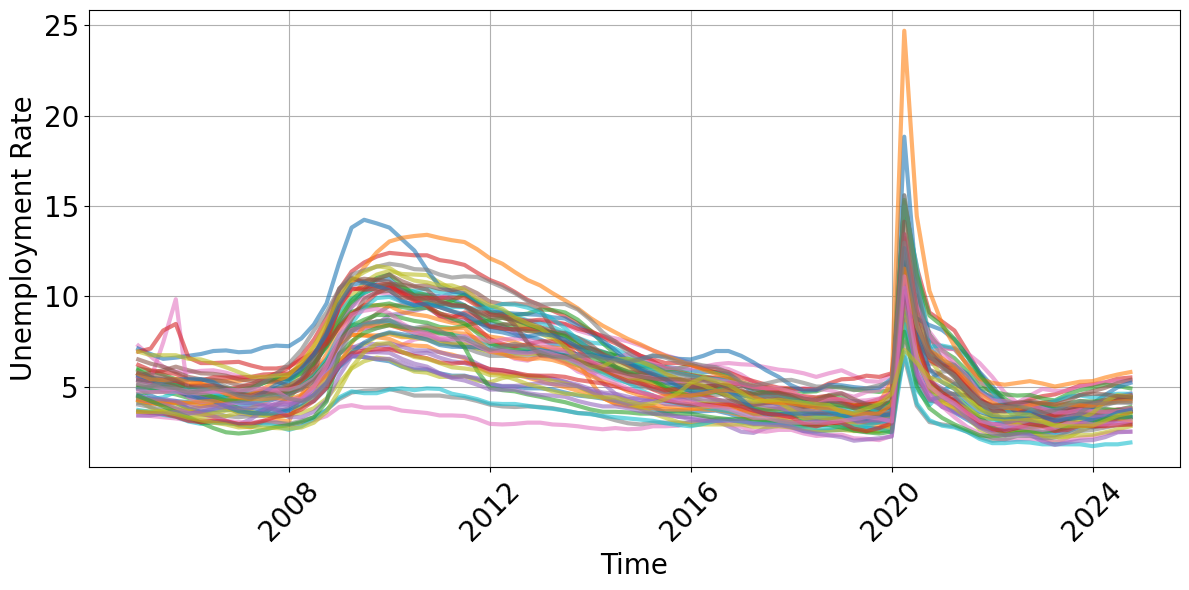

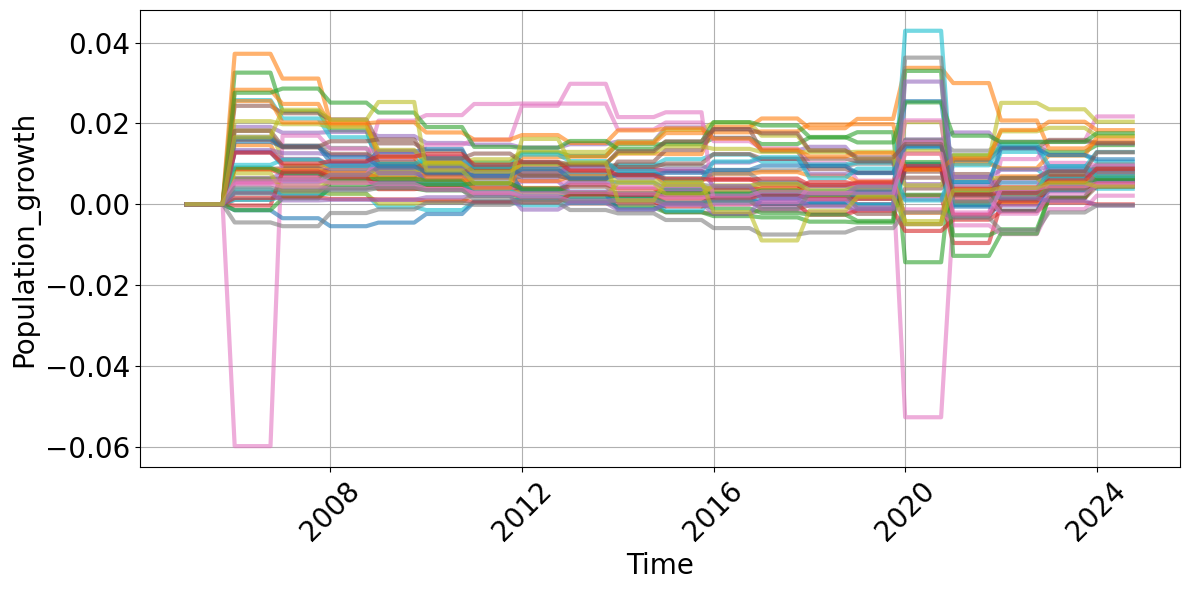

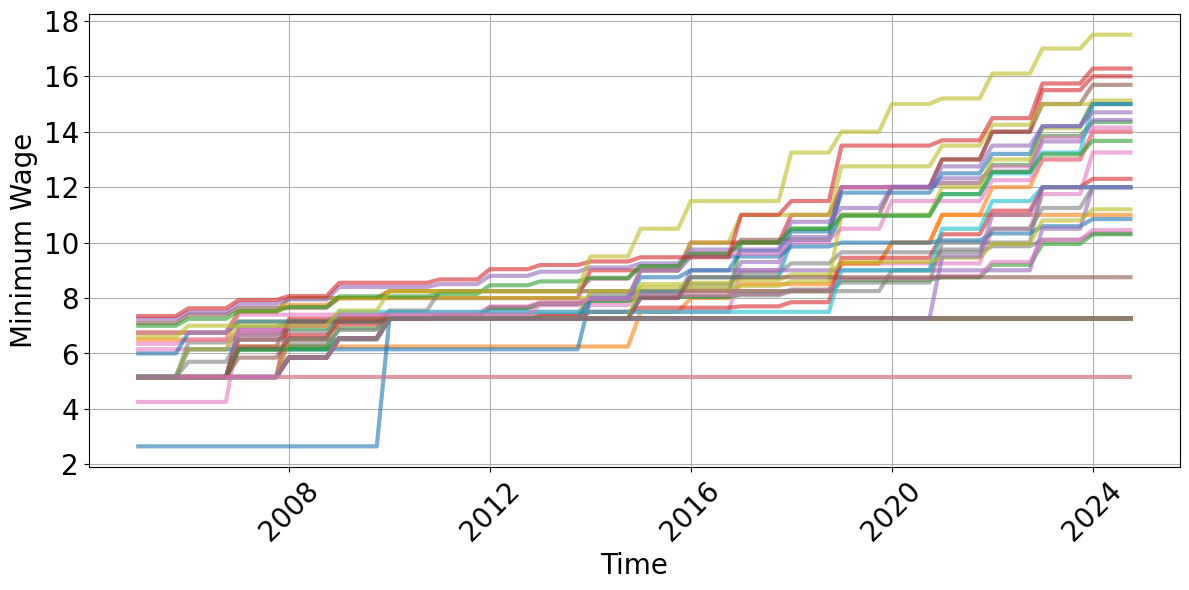

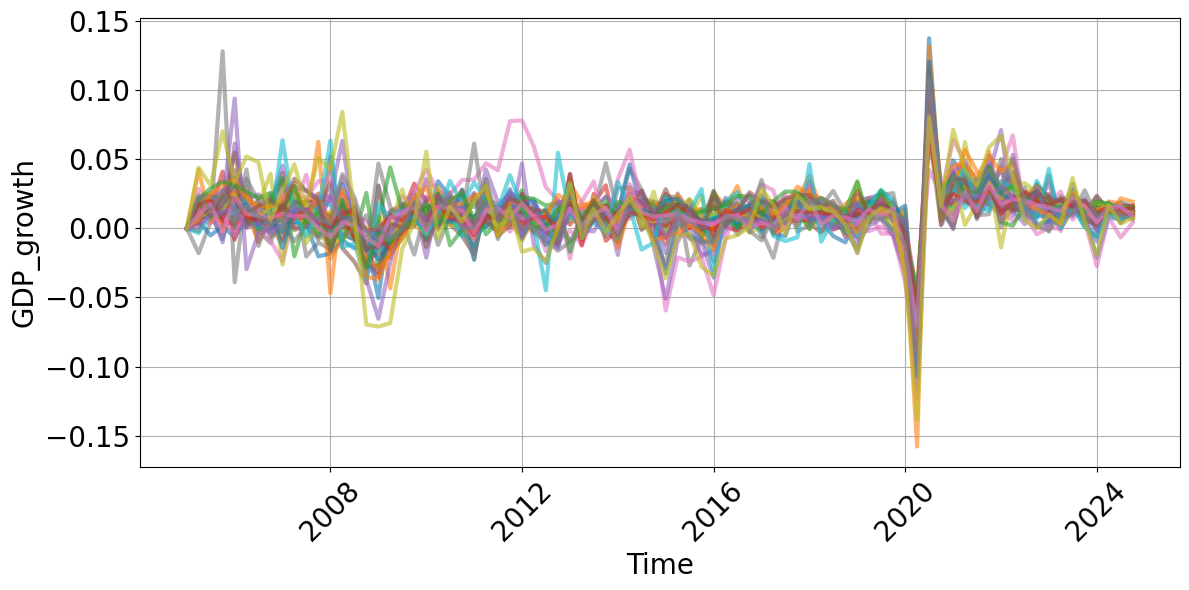

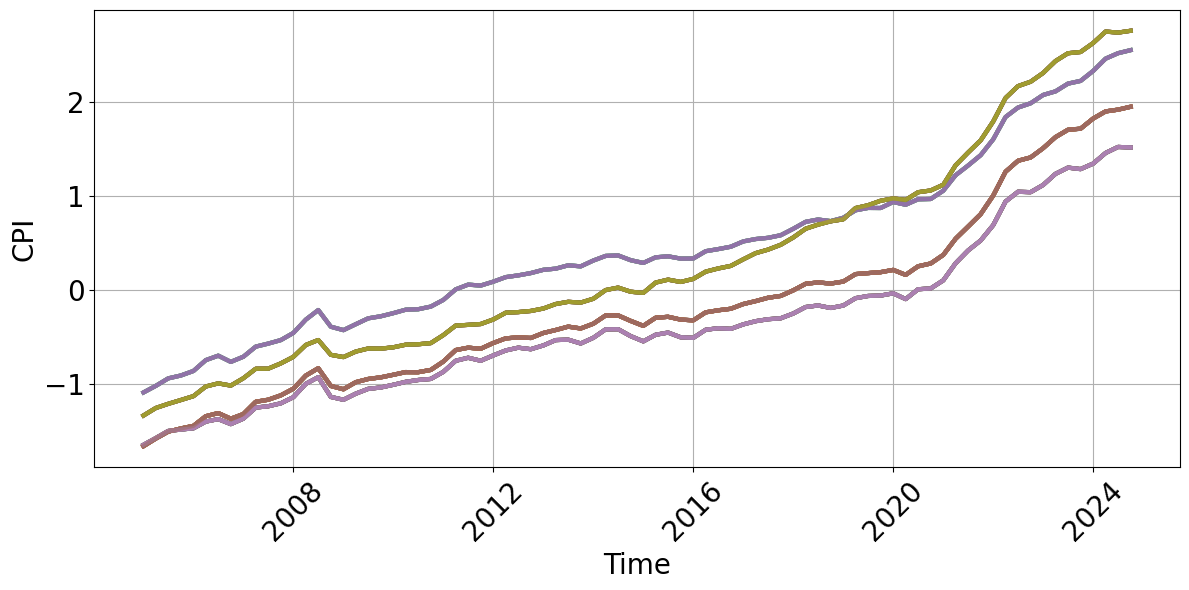

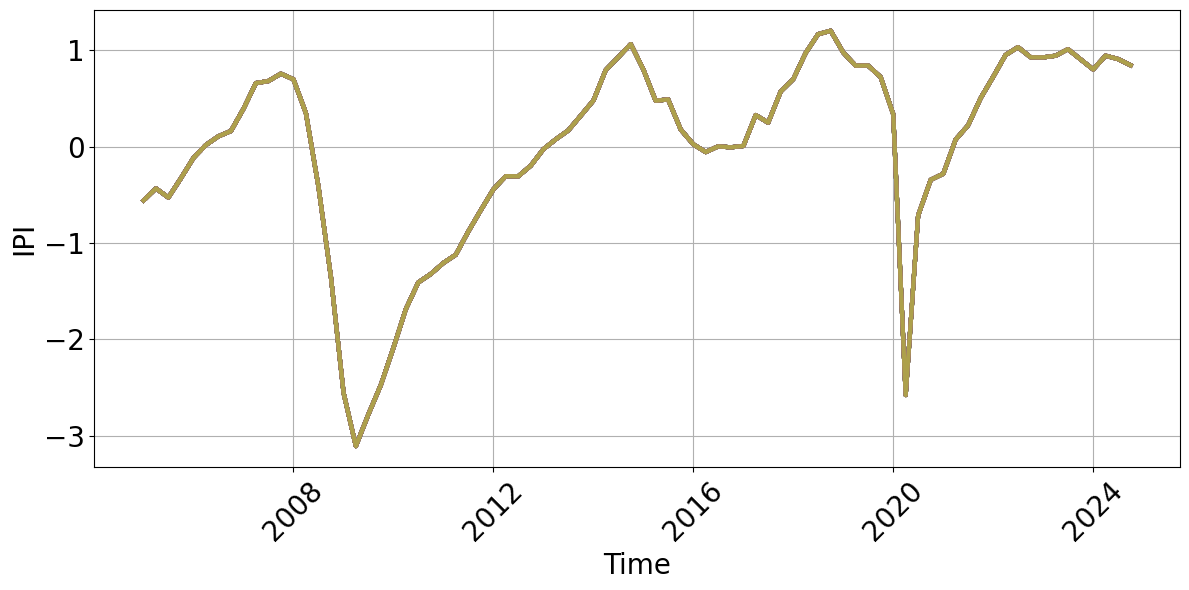

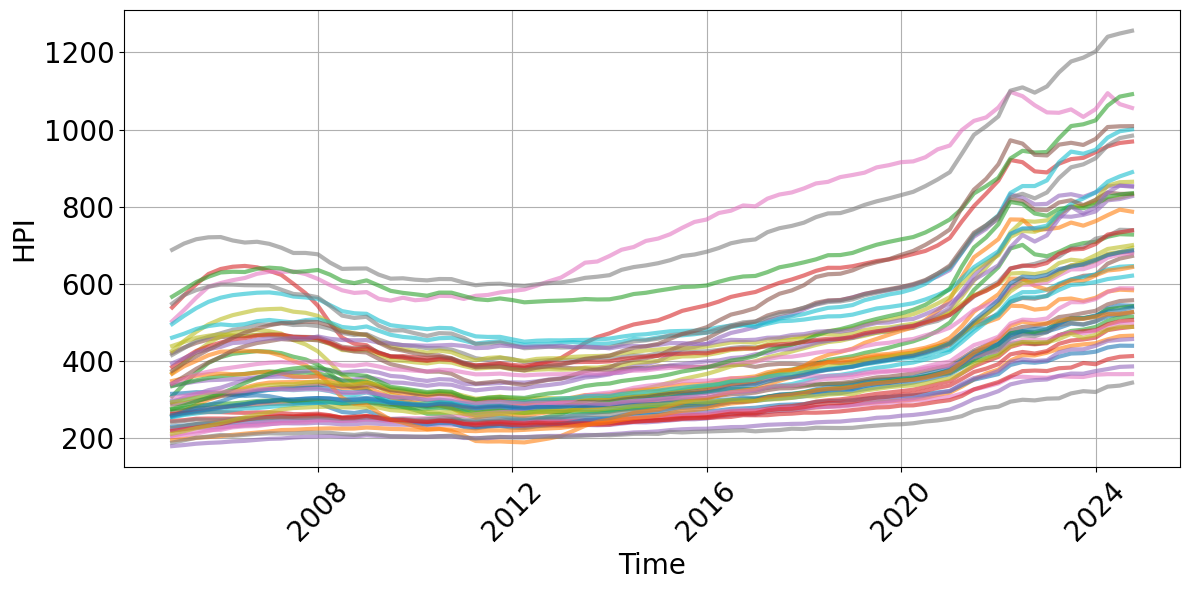

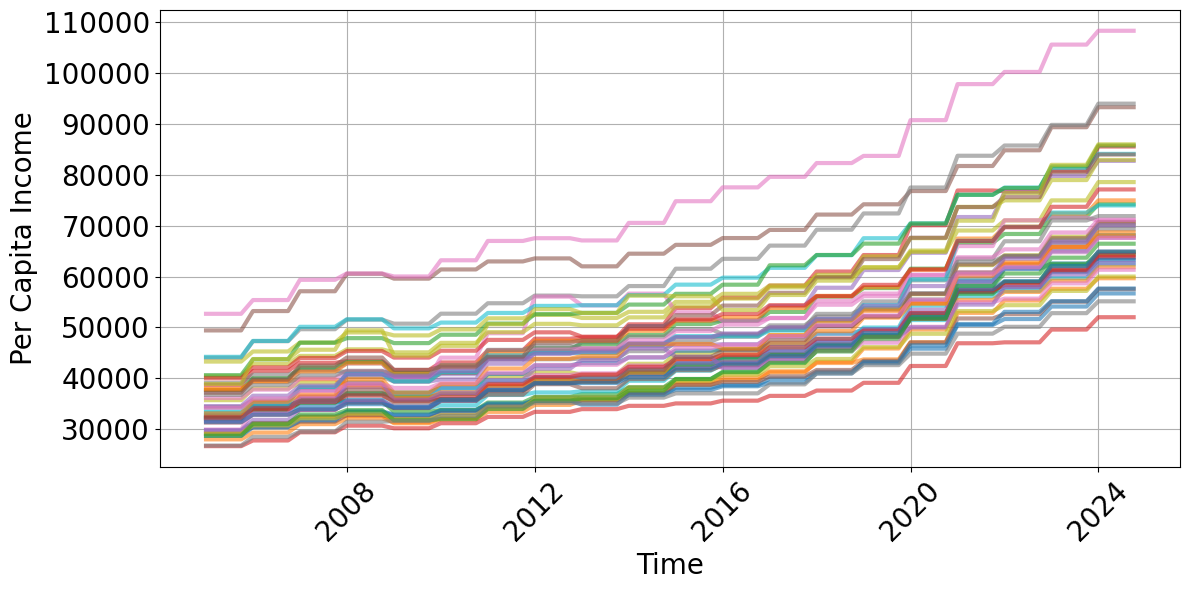

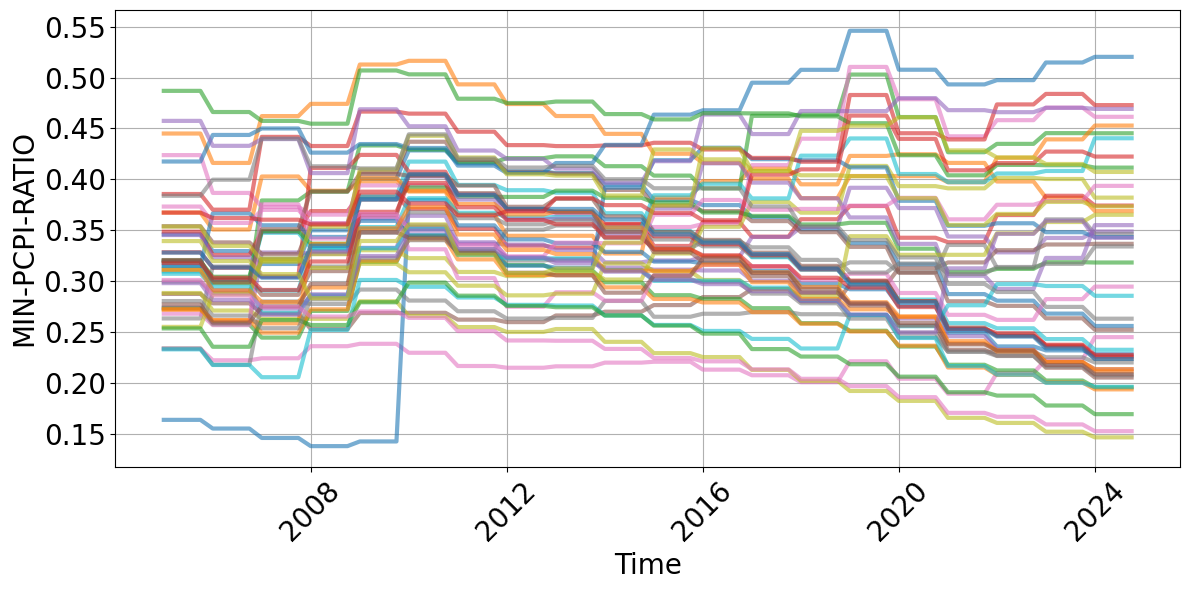

In [32]:
import matplotlib.pyplot as plt

# 设置变量列表和图标题
variables = ["unemployment_rate", "pop_growth", "min_wage", "gdp_growth", "cpi", "ipi", "hpi", "pcpi","ratio"]
titles = ["Unemployment Rate", "Population_growth", "Minimum Wage", "GDP_growth", "CPI", "IPI", "HPI", "Per Capita Income", "MIN-PCPI-RATIO"]

# 每个变量画一张图
for var, title in zip(variables, titles):
    plt.figure(figsize=(12, 6))
    
    for state, group in df_merged.groupby("state"):
        plt.plot(group["date"], group[var], label=state, alpha=0.6,linewidth=3)
    
    # plt.title(title)

    
    plt.xlabel("Time", fontsize=20)
    plt.ylabel(title, fontsize=20)
    plt.yticks(fontsize=20)
    plt.xticks(rotation=45, fontsize=20)
    plt.tight_layout()
    # plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), fontsize="small", ncol=2)
    plt.grid(True)
    plt.show()


In [16]:
# !pip install geopandas
# !pip install libpysal

In [17]:
import geopandas as gpd
from libpysal.weights import Queen

path = "F:\\R\\代码\\0111restart\\经济面板数据\\states\\ne_110m_admin_1_states_provinces.shp"


# 加载美国州 shapefile
gdf = gpd.read_file(path)
us_states = gdf[gdf['iso_a2'] == 'US']
us_states = us_states[~us_states["iso_3166_2"].isin(['US-AK', 'US-HI'])]

# 假设 us_states 中的州缩写列是 'postal'，比如 'CA', 'TX' 等
us_states_sorted = us_states.set_index('postal').loc[states].reset_index()

# Queen 邻接（共享边界即连接）
w = Queen.from_dataframe(us_states_sorted)
adj_matrix = w.full()[0]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2392\614861879.py:16: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(us_states_sorted)


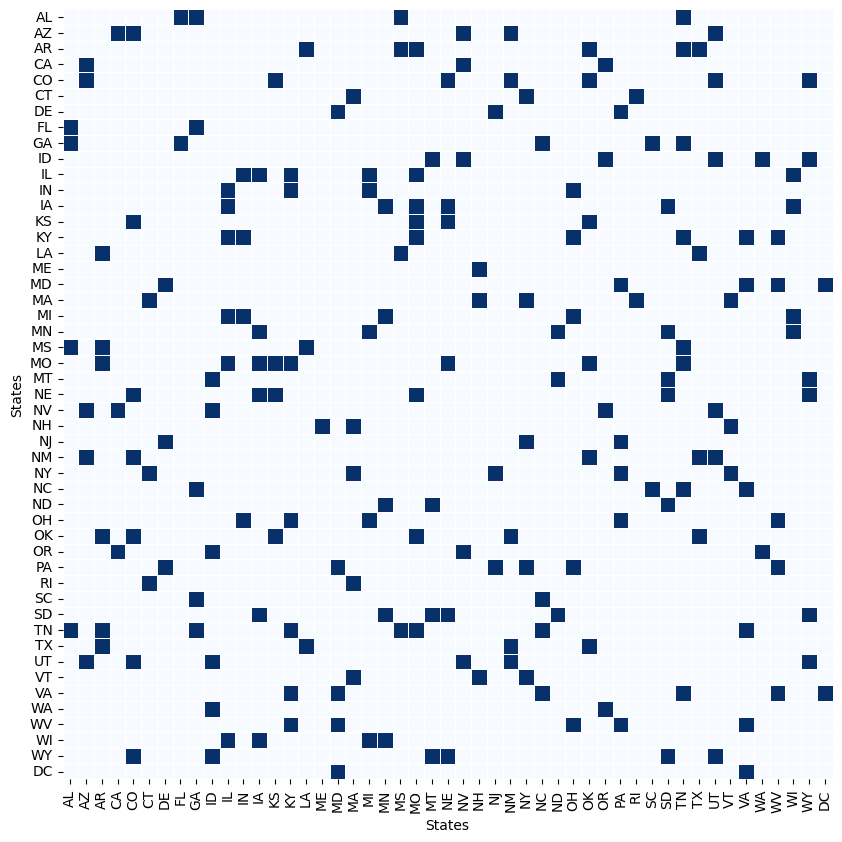

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
np.fill_diagonal(adj_matrix, 0)  # 对角线置为 0，自己不与自己连边

# 可视化邻接矩阵
plt.figure(figsize=(12, 10))
sns.heatmap(adj_matrix, xticklabels=states, yticklabels=states, cmap="Blues", cbar=False, square=True, linewidths=0.5)
# plt.title("Adjacency Matrix of US States")
plt.xlabel("States")
plt.ylabel("States")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [19]:
df_merged

cols_to_standardize = ['cpi', 'ipi']  # 替换为你要处理的列名
df_merged[cols_to_standardize] = df_merged[cols_to_standardize].apply(
    lambda x: (x - x.mean()) / x.std()
)

In [20]:
import numpy as np

GDP_growth_list = []
UR_list = []
CPI_list = []
CPI_growth_list = []
HPI_list = []
IPI_list = []
PCPI_list = []
population_list = []
min_wage_list = []
ratio_list = []

A_mat = []

for state in states:
    state_data = df_merged[df_merged["state"] == state]
    print(f"State name {state}, len: {len(state_data)}")
    UR_list.append(state_data[["unemployment_rate"]].values)
    GDP_growth_list.append(state_data["gdp_growth"].values)
    CPI_list.append(state_data[["cpi"]].values)
    CPI_growth_list.append(state_data[["cpi_growth"]].values)
    HPI_list.append(state_data[["hpi"]].values)
    IPI_list.append(state_data[["ipi"]].values)
    PCPI_list.append(state_data[["pcpi"]].values)
    population_list.append(state_data[["pop_growth"]].values)
    min_wage_list.append(state_data[["min_wage"]].values)
    ratio_list.append(state_data[["ratio"]].values)

UR_tensor = np.array(UR_list)
GDP_growth_tensor = np.array(GDP_growth_list)
CPI_tensor = np.array(CPI_list)
CPI_growth_tensor = np.array(CPI_growth_list)
HPI_tensor = np.array(HPI_list)
IPI_tensor = np.array(IPI_list)
PCPI_tensor = np.array(PCPI_list)
population_growth_tensor = np.array(population_list)
wage_tensor = np.array(min_wage_list)
ratio_tensor = np.array(ratio_list)

W_mat = adj_matrix / (np.sum(adj_matrix, axis=1, keepdims=True) + 1e-5)  # 归一化邻接矩阵

State name AL, len: 80
State name AZ, len: 80
State name AR, len: 80
State name CA, len: 80
State name CO, len: 80
State name CT, len: 80
State name DE, len: 80
State name FL, len: 80
State name GA, len: 80
State name ID, len: 80
State name IL, len: 80
State name IN, len: 80
State name IA, len: 80
State name KS, len: 80
State name KY, len: 80
State name LA, len: 80
State name ME, len: 80
State name MD, len: 80
State name MA, len: 80
State name MI, len: 80
State name MN, len: 80
State name MS, len: 80
State name MO, len: 80
State name MT, len: 80
State name NE, len: 80
State name NV, len: 80
State name NH, len: 80
State name NJ, len: 80
State name NM, len: 80
State name NY, len: 80
State name NC, len: 80
State name ND, len: 80
State name OH, len: 80
State name OK, len: 80
State name OR, len: 80
State name PA, len: 80
State name RI, len: 80
State name SC, len: 80
State name SD, len: 80
State name TN, len: 80
State name TX, len: 80
State name UT, len: 80
State name VT, len: 80
State name 

In [21]:
df_merged

,date,unemployment_rate,state,gdp,min_wage,cpi,ipi,pcpi,hpi,pop,gdp_growth,cpi_growth,pop_growth,ratio
0,2005-01-01,4.900000,AL,155647.0,5.15,-1.655545,-0.557259,29780,255.84,4569.805,0.000000,0.000000,0.000000,0.345870
1,2005-04-01,4.500000,AL,157994.9,5.15,-1.574818,-0.433568,29780,261.92,4569.805,0.015085,0.014796,0.000000,0.345870
2,2005-07-01,4.233333,AL,158924.5,5.15,-1.500984,-0.527513,29780,267.40,4569.805,0.005884,0.013336,0.000000,0.345870
3,2005-10-01,4.200000,AL,162142.8,5.15,-1.467512,-0.326426,29780,272.87,4569.805,0.020250,0.005966,0.000000,0.345870
4,2006-01-01,4.133333,AL,163613.4,5.15,-1.439947,-0.115325,31264,278.29,4628.981,0.009070,0.004884,0.012949,0.329452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,2023-10-01,2.800000,WY,53147.8,17.00,2.535708,0.905818,81918,460.00,585.067,0.004673,0.001379,0.005308,0.415049
3836,2024-01-01,2.833333,WY,52101.0,17.50,2.630758,0.801677,85945,467.76,587.618,-0.019696,0.009853,0.004360,0.407237
3837,2024-04-01,3.100000,WY,52979.9,17.50,2.752930,0.943446,85945,481.47,587.618,0.016869,0.012540,0.004360,0.407237
3838,2024-07-01,3.400000,WY,53153.5,17.50,2.741874,0.908743,85945,488.59,587.618,0.003277,-0.001121,0.004360,0.407237


In [22]:
np.savez('economy_data.npz',
         UR=UR_tensor,
         GDP_growth=GDP_growth_tensor,
        CPI=CPI_tensor,
        HPI=HPI_tensor,
        IPI=IPI_tensor,
        PCPI=PCPI_tensor,
         population_growth=population_growth_tensor,
         Action=ratio_tensor,
         W=W_mat,
         state_names = states
         )

In [1]:
import json
import numpy as np
from utils import plot_time_series, plot_coefficients, plot_residuals
from utils_Fit import Fit4S, Fit4Y
from utils_select_G import selectG
from Estimate import Iter_model


# extract data
data = np.load('economy_data.npz')

# ur_tensor = UR_tensor
# gdp_growth_tensor = GDP_growth_tensor[:, :, np.newaxis, np.newaxis]
# cpi_tensor = CPI_tensor[:, :, :, np.newaxis]
# cpi_growth_tensor = CPI_growth_tensor[:, :, :, np.newaxis]
# hpi_tensor = HPI_tensor[:, :, :, np.newaxis]
# pcpi_tensor = PCPI_tensor[:, :, :, np.newaxis]
# ipi_tensor = IPI_tensor[:, :, :, np.newaxis]
# population_growth_tensor = population_growth_tensor.reshape(pcpi_tensor.shape)
# Action_tensor = ratio_tensor[:, :, :, np.newaxis]
ur_tensor = data['UR']
gdp_growth_tensor = data['GDP_growth'][:, :, np.newaxis, np.newaxis]
cpi_tensor = data['CPI'][:, :, :, np.newaxis]
hpi_tensor = data['HPI'][:, :, :, np.newaxis]
pcpi_tensor = data['PCPI'][:, :, :, np.newaxis]
ipi_tensor = data['IPI'][:, :, :, np.newaxis]
population_growth_tensor = data["population_growth"][:, :, :, np.newaxis]
Action_tensor = data['Action'][:, :, :, np.newaxis]
W_mat = data['W']
state_names = data['state_names']



# NN TT PP 1

Stensor = np.concatenate((gdp_growth_tensor, cpi_tensor), axis=2)
Ztensor = np.concatenate((pcpi_tensor, ipi_tensor, hpi_tensor, population_growth_tensor), axis=2)
S0 = Stensor[:, 0:1, :, :]
Abar = np.einsum("ij, jklm->iklm", W_mat, Action_tensor)

NN, TT, PP, _ = Stensor.shape
J0 = 4

Timevec = [i for i in range(TT)]
Timevec = np.array(Timevec) / TT
splinetype = "b_spline"
IV_type = "1"
lambda_NT = 0.05
mu_G = 0.1
Glist = [1, 2, 3, 4, 5]

# plot_time_series(GDP_growth_tensor[:, :, :,np.newaxis], Gvec=Gvec, mode="Y")
# plot_time_series(State_tensor, Gvec=Gvec, mode="S")

SAVE_MODEL = False

# Ghat = selectG(
#     Timevec=Timevec,
#     S0=S0, Stensor=Stensor,
#     W=W_mat, Ztensor=Ztensor,
#     Ytensor=ur_tensor,
#     A=Action_tensor, Abar=Abar,
#     J0=J0, Glist=Glist, lambda_NT=lambda_NT, mu_G=mu_G
# )
Ghat = 3
res_dict4S, res_dict4Y = Iter_model(
    Timevec=Timevec,
    S0mat=S0, Stensor=Stensor,
    Wmat=W_mat, Ztensor= Ztensor,
    Ytensor=ur_tensor,
    Atensor=Action_tensor, Abar= Abar,
    Gnum=Ghat, J0=J0,
    Gvec_real=None,
    splinetype=splinetype,
    IV_type=IV_type,
    max_iter=100, tol=1e-6, oracle=False
)

Gvec = res_dict4S["Gvec"]

group1 = list(state_names[np.where(Gvec == 0)[0]])
group2 = list(state_names[np.where(Gvec == 1)[0]])
group3 = list(state_names[np.where(Gvec == 2)[0]])
group4 = list(state_names[np.where(Gvec == 3)[0]])

print("group1=", ", ".join(f'"{s}"' for s in state_names[np.where(Gvec == 0)[0]]))
print("group2=", ", ".join(f'"{s}"' for s in state_names[np.where(Gvec == 1)[0]]))
print("group3=:", ", ".join(f'"{s}"' for s in state_names[np.where(Gvec == 2)[0]]))

import pandas as pd

# 构建 DataFrame
df = pd.DataFrame({
    'state': group1 + group2 + group3+group4,
    'group': ['Group 1'] * len(group1) + ['Group 2'] * len(group2) + ['Group 3'] * len(group3) + ['Group 4'] * len(group4)
})

import plotly.express as px
import pandas as pd

# 使用 plotly 画地图
fig = px.choropleth(df,
                    locations='state',
                    locationmode="USA-states",
                    color='group',
                    scope="usa",
                    color_discrete_map={'Group 1': '#4FC3F7', 'Group 2': '#FFB74D', 'Group 3': '#BA68C8', 'Group 4': '#81C784'},
                    title="State Groups on US Map")

fig.update_layout(legend_title_text='Group', title_x=0.5)
fig.show()


Converged after 4 iterations.
group1= "AZ", "CA", "CT", "DE", "ID", "ME", "MA", "NV", "NH", "NJ", "NM", "NY", "OR", "PA", "RI", "UT", "VT", "WA", "DC"
group2= "AR", "FL", "IL", "IN", "IA", "KS", "KY", "MI", "MN", "MS", "MO", "NE", "NC", "ND", "OH", "OK", "SC", "SD", "TN", "VA", "WI"
group3=: "AL", "CO", "GA", "LA", "MD", "MT", "TX", "WV", "WY"


In [24]:
# import plotly.express as px
# import pandas as pd

# group1 = ['KS', 'ME', 'MA', 'NJ', 'PA', 'VT', 'DC']
# group2 = ['AL', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KY', 'LA', 'MI',
#           'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NM', 'NY', 'NC', 'ND', 'OR', 'RI', 'SC',
#           'SD', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WY']
# group3 = ['AR', 'DE', 'MD', 'OH', 'OK', 'WV']

# group1 = ["AL", "AZ", "CT", "FL", "GA", "ID", "IA", "KY", "ME", "MA", "MS", "NE", "NV", "NH", "NJ", "NY", "OH", "OR", "RI", "SC", "SD", "VT", "VA", "DC"]
# group2 = ["AR", "CA", "IL", "IN", "KS", "LA", "MI", "MN", "MO", "NC", "ND", "OK", "PA", "TN", "TX", "UT", "WA", "WI", "WY"]
# group3 = ["CO", "DE", "MD", "MT", "NM", "WV"]

# # 构建 DataFrame
# df = pd.DataFrame({
#     'state': group1 + group2 + group3,
#     'group': ['Group 1'] * len(group1) + ['Group 2'] * len(group2) + ['Group 3'] * len(group3)
# })

# # 使用 plotly 画地图
# fig = px.choropleth(df,
#                     locations='state',
#                     locationmode="USA-states",
#                     color='group',
#                     scope="usa",
#                     color_discrete_map={'Group 1': 'purple', 'Group 2': 'cyan', 'Group 3': 'khaki'},
#                     title="State Groups on US Map")

# fig.update_layout(legend_title_text='Group', title_x=0.5)
# fig.show()


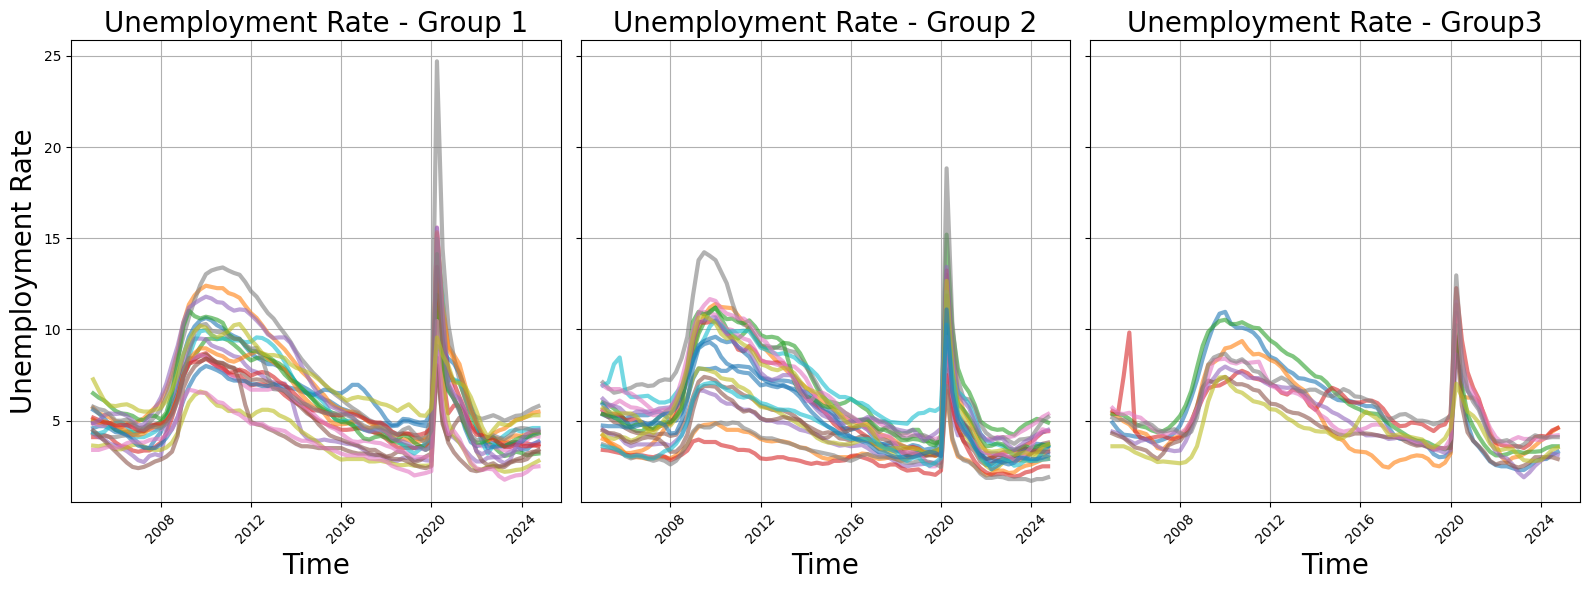

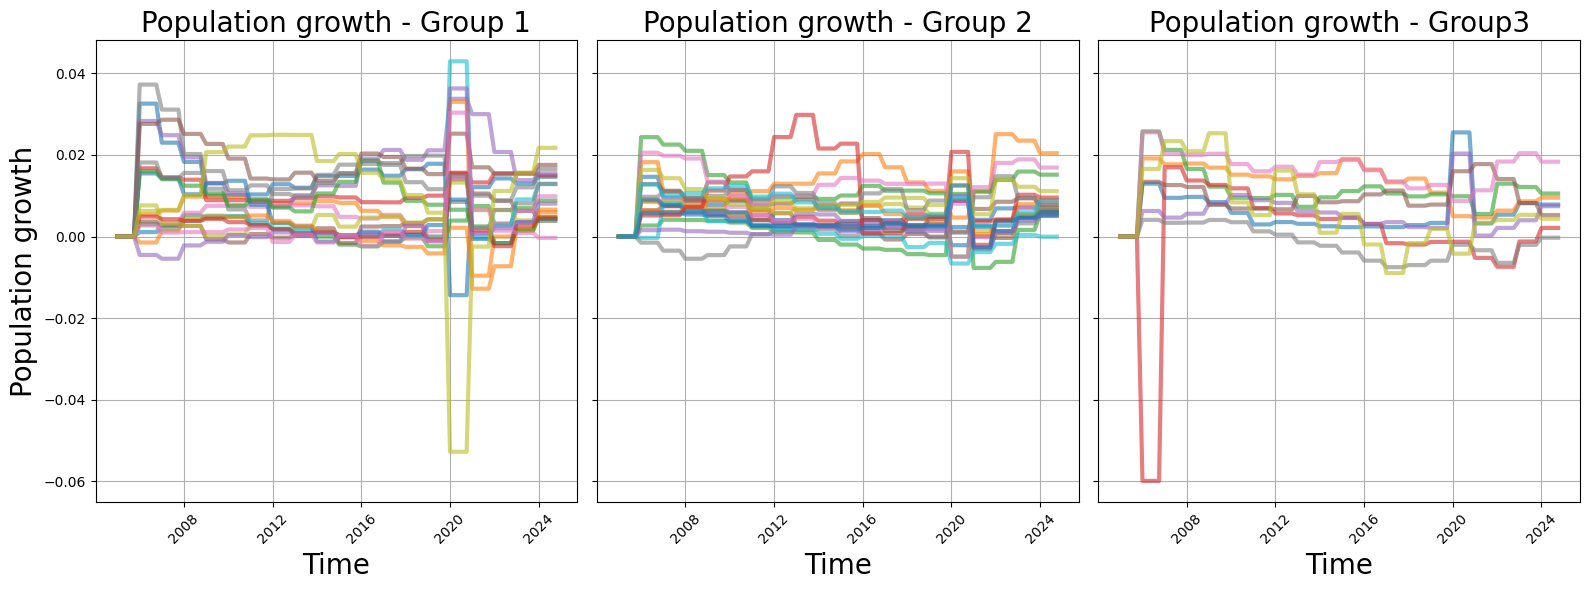

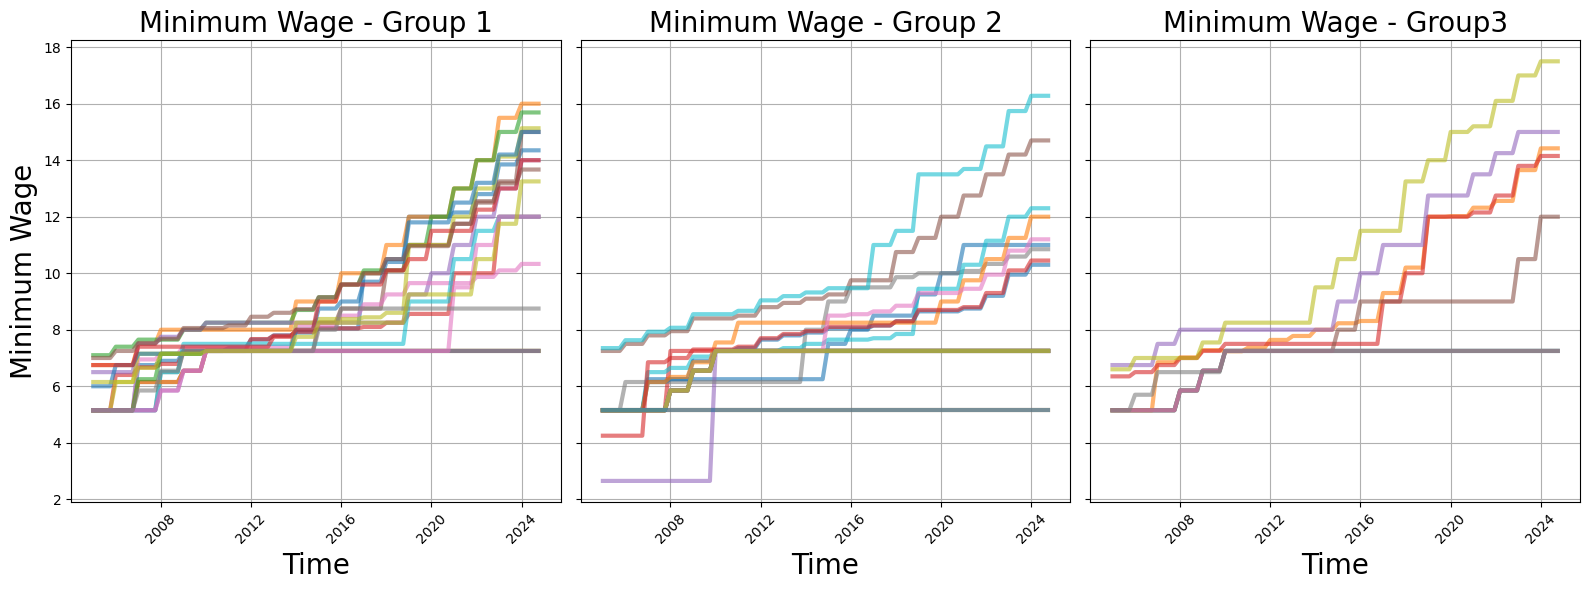

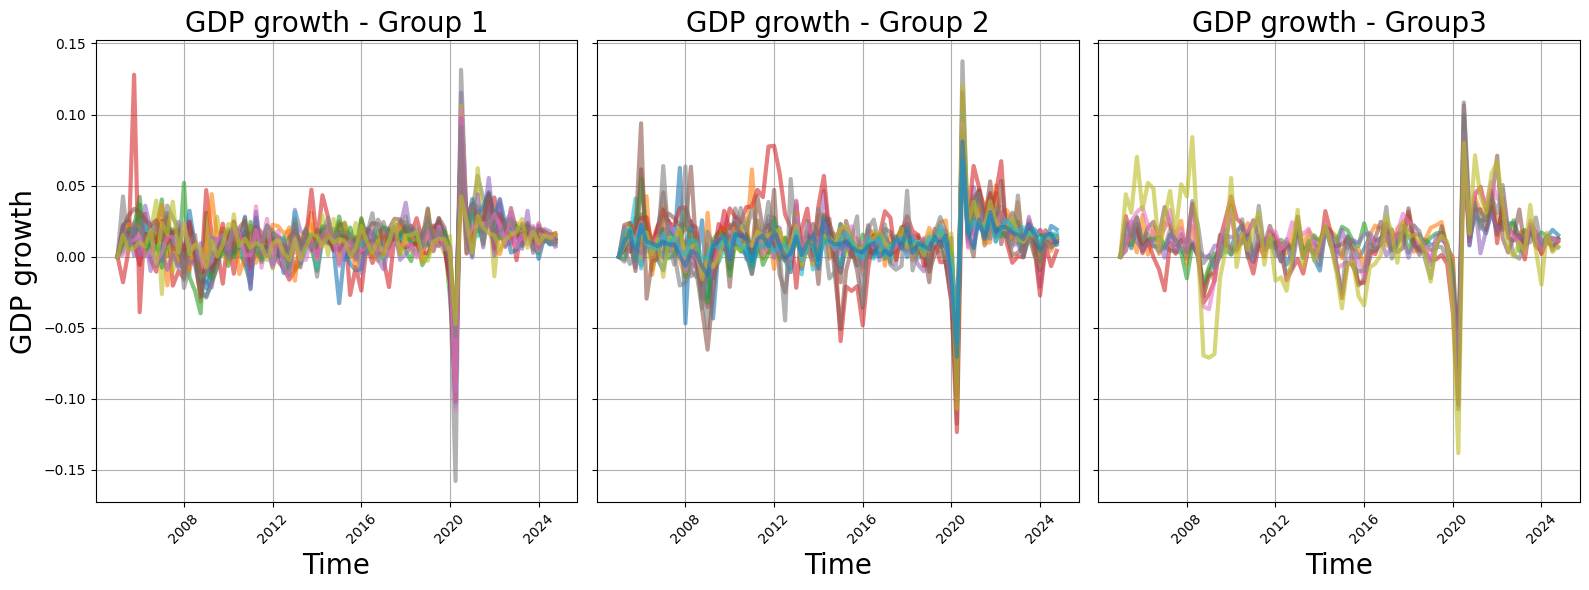

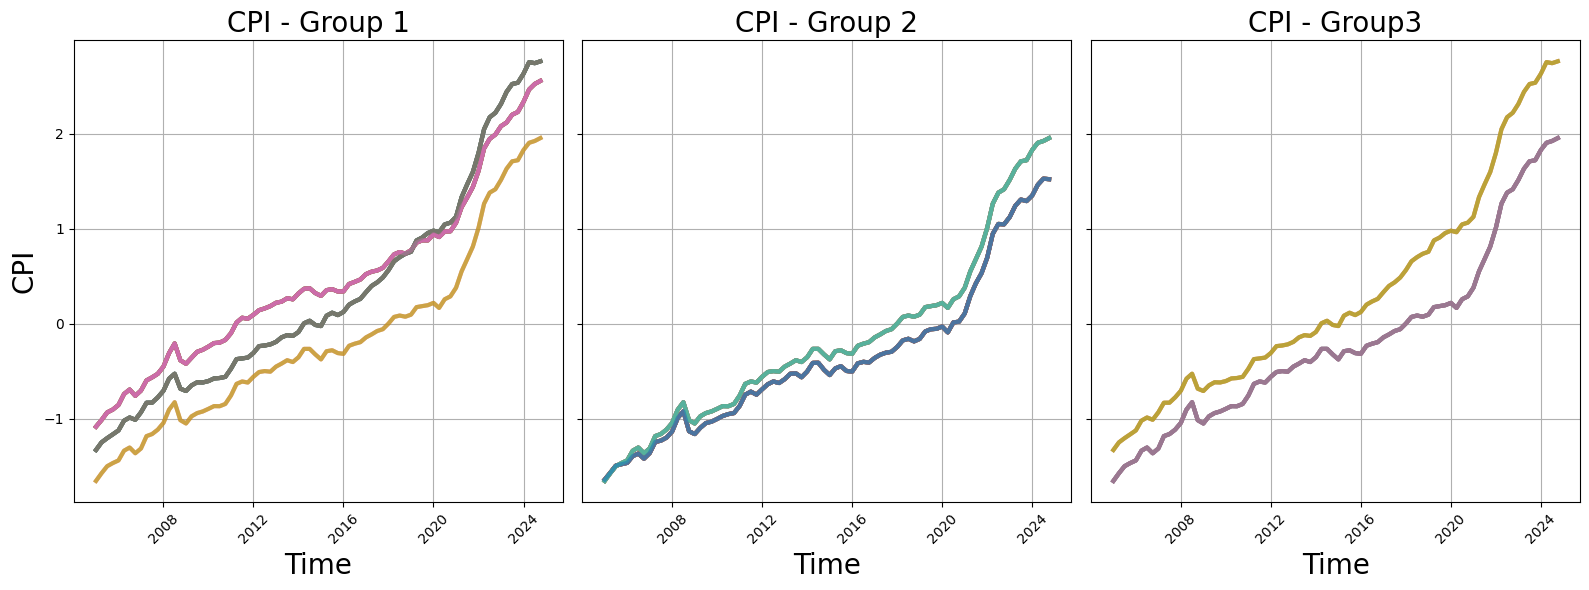

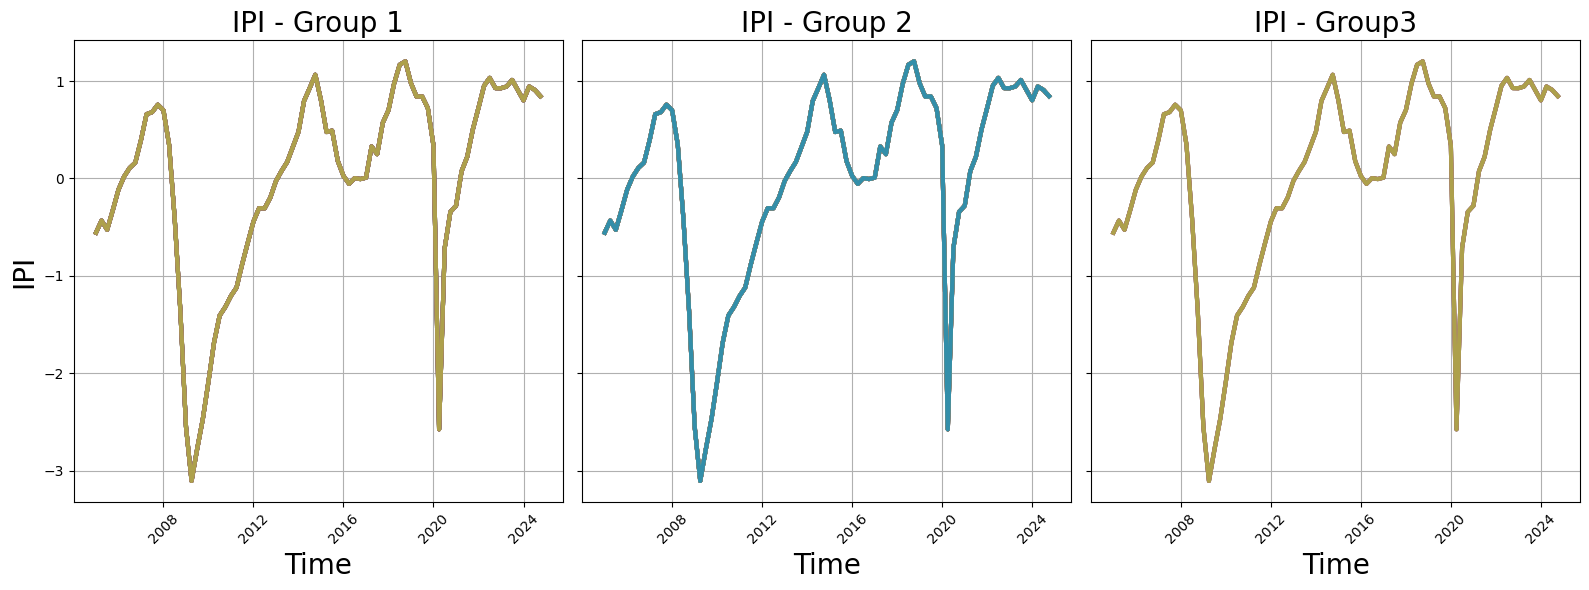

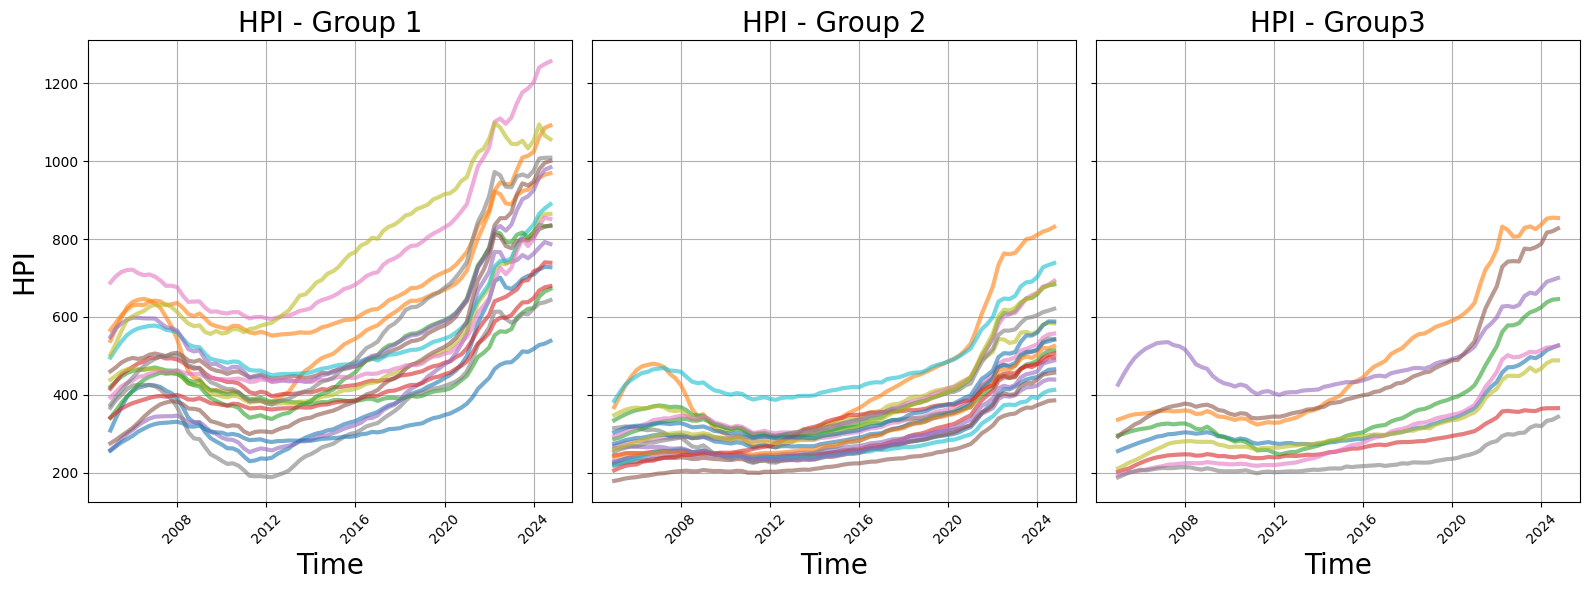

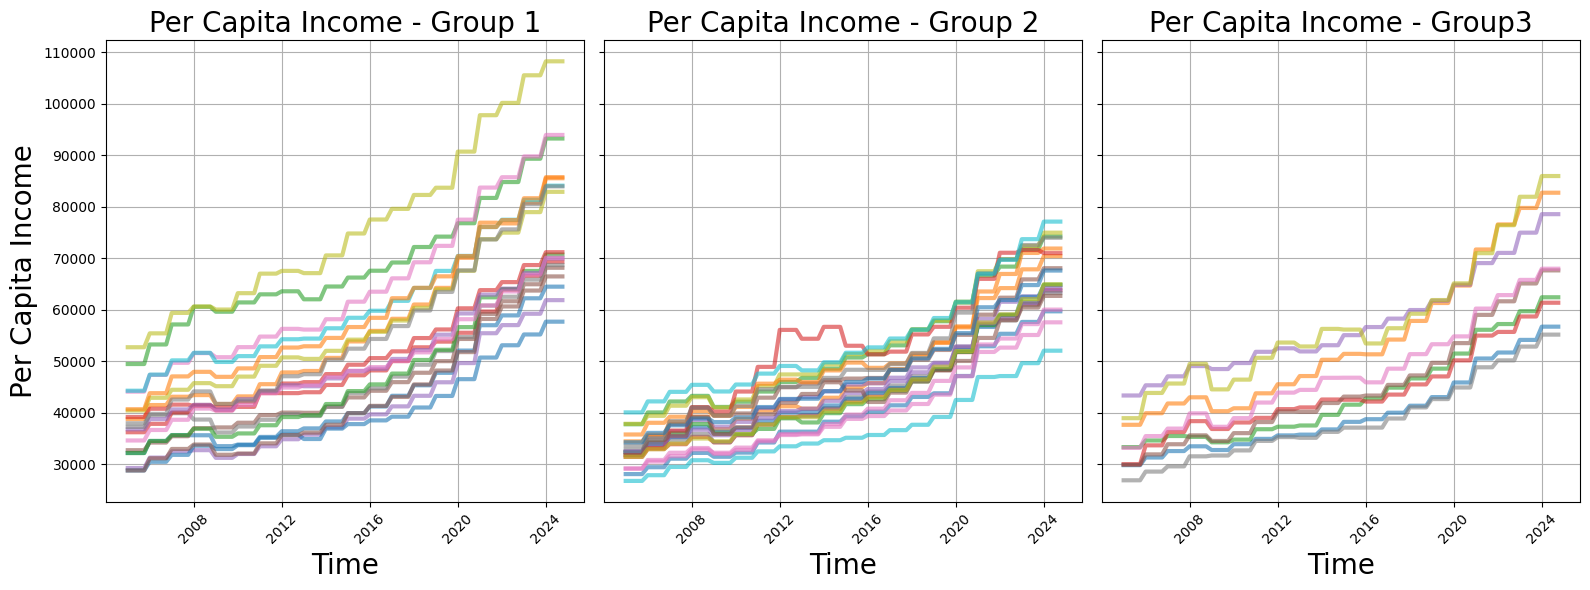

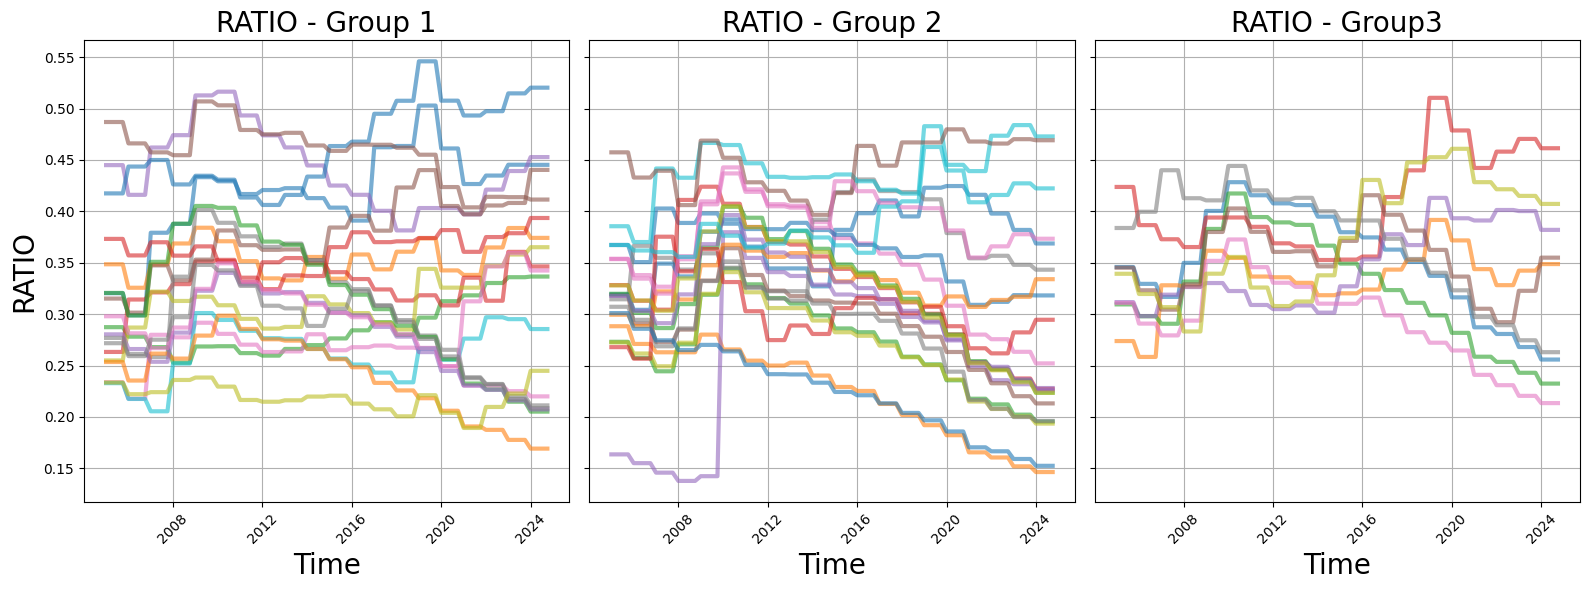

In [28]:
import matplotlib.pyplot as plt

# 设置变量列表和图标题
# variables = ["unemployment_rate", "pop_growth", "min_wage", "gdp_growth"]
# titles = ["Unemployment Rate", "Population Growth", "Minimum Wage", "GDP Growth"]

variables = ["unemployment_rate", "pop_growth", "min_wage", "gdp_growth", "cpi", "ipi", "hpi", "pcpi", "ratio"]
titles = ["Unemployment Rate", "Population growth", "Minimum Wage", "GDP growth", "CPI", "IPI", "HPI", "Per Capita Income", "RATIO"]

# 每个变量画两个子图（group1 vs group2）
for var, title in zip(variables, titles):
    fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
    
    for i, (group, name) in enumerate(zip([group1, group2, group3], ["Group 1", "Group 2",  "Group3"])):
        ax = axes[i]
        for state in group:
            df = df_merged[df_merged["state"] == state]
            ax.plot(df["date"], df[var], label=state, alpha=0.6, linewidth=3)


        ax.set_title(f"{title} - {name}", fontsize=20)
        ax.set_xlabel("Time", fontsize=20)
        ax.set_ylabel(title if i == 0 else "", fontsize=20)  # 只在左图显示 ylabel
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True)
    
    plt.tight_layout()
    # plt.legend(loc="upper center", bbox_to_anchor=(1.05, 1), fontsize="small", ncol=2)
    plt.show()
